In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris


In [5]:

from sklearn.datasets import make_classification

# Generate a synthetic dataset with 200 samples, 2 features, and 2 classes
# Explicitly set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1,
                            n_informative=1, n_redundant=0, random_state=42)

   Feature 1  Feature 2  Target
0   0.857660   1.120622       1
1  -1.260884  -0.740655       0
2   0.747294   0.318446       1
3   1.163164  -0.727238       0
4  -3.241267  -1.361655       0


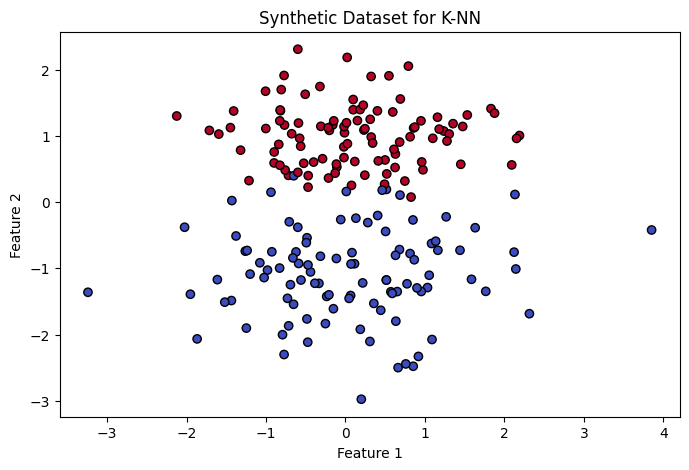

In [8]:
# Convert to a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Save dataset as a CSV file
df.to_csv("knn_dataset.csv", index=False)

# Display the first few rows
print(df.head())

# Plot the dataset
plt.figure(figsize=(8, 5))
plt.scatter(df['Feature 1'], df['Feature 2'], c=df['Target'], cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset for K-NN")
plt.show()

In [9]:
# Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels



In [10]:

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# Normalize the features (important for distance-based models like K-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN model with K=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)




In [12]:
# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [14]:
# Make predictions
y_pred = knn.predict(X_test)


In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [16]:
# Plot the error rate for different values of K (Elbow method)
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(np.mean(y_pred_k != y_test))


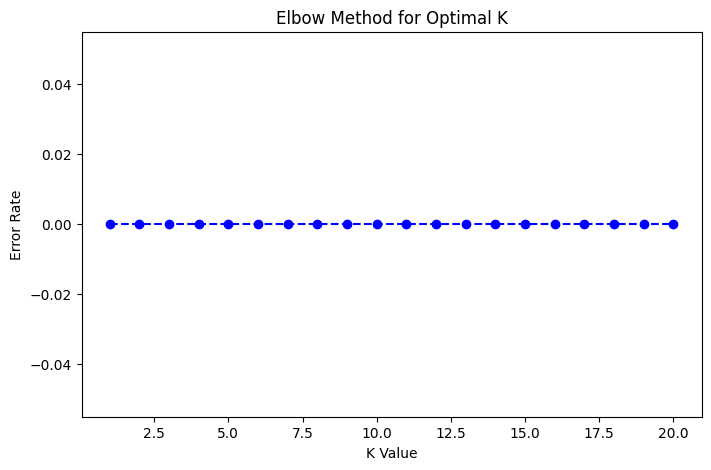

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal K")
plt.show()